# Extract raster elevation data

In this Notebook we are going to extract the elevation of several points randomly selected over a digital elevation model (DEM)

<img src="util/raster_DEM_2D_3D.png" style="width: 800px">

## **Steps**
### 0. Import the necessary libraries

In [23]:
# Import libraries
import numpy as np  # Import the NumPy library for numerical operations, particularly for arrays.
import rasterio  # Import the rasterio library for reading and writing geospatial raster data (like GeoTIFFs).
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module for creating plots and visualizations.

### 1. Load the DEM Raster  
   - The code uses `rasterio` to open a DEM stored in `'datos/dem.tif'`.
   - The DEM is read as a 2D NumPy array (`dem`) representing elevation values.

In [24]:
# Open the Digital Elevation Model (DEM) raster file
raster = rasterio.open('datos/dem.tif')

# Read the first band of the DEM (assuming it's a single-band raster)
dem = raster.read(1)  # Extracts a 2D array representing elevation values

# Get the number of rows and columns in the DEM
nrows, ncols = dem.shape

raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -32767.0,
 'width': 286,
 'height': 161,
 'count': 1,
 'crs': CRS.from_epsg(25830),
 'transform': Affine(5.0, 0.0, 409412.5,
        0.0, -5.0, 4132972.5)}

### 2. Generate Random Points  
   - The shape of the DEM is obtained (`nrows, ncols`).
   - A total of `30` random points are generated within the raster’s row and column limits using `np.random.randint()`.

In [25]:
# Define the number of points to extract
n_points = 30

# Generate random row and column indices within the DEM dimensions
np.random.seed(42) # Set a random seed for reproducibility
row_coords = np.random.randint(0, nrows, n_points) # generate random integer values
col_coords = np.random.randint(0, ncols, n_points) # generate random integer values

### 3. Extract Elevation Values
   - Using the randomly generated coordinates, elevation values are retrieved from the `dem` array.

In [26]:
# Extract elevation values at the randomly selected points
elevations = dem[row_coords, col_coords]

### 4. Plot the DEM and Sample Points
   - The DEM is displayed using a terrain colormap (`cmap='terrain'`).
   - The extracted elevation points are overlaid on the DEM using `plt.scatter()`, with colors representing their elevation values.
   - A color bar, legend, and title are added for clarity.

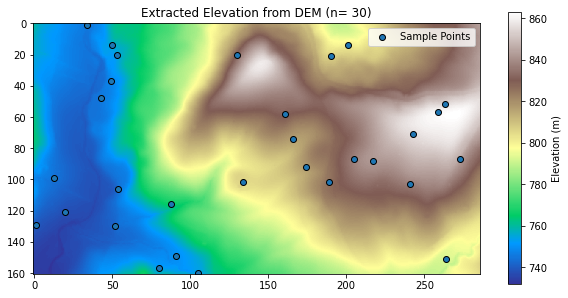

In [27]:
# Plot the DEM with the extracted points
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(dem, cmap='terrain')  # Display the DEM using a terrain colormap
plt.colorbar(label='Elevation (m)')  # Add a color bar indicating elevation values
plt.scatter(col_coords, row_coords, edgecolor='k', label='Sample Points')  
# Overlay the randomly selected points, color-coded by elevation

plt.legend()  # Display the legend
plt.title('Extracted Elevation from DEM (n= '+str(n_points)+')')  # Add a title
plt.show()  # Display the plot

In [28]:
# Print on the screen the elevation values of the random points
print(elevations)

[825.743 817.664 755.517 743.4   856.195 831.165 805.35  737.144 816.88
 843.456 765.285 744.507 836.842 792.865 741.74  750.08  855.356 744.759
 837.281 752.888 747.851 739.659 753.518 753.572 861.193 805.976 842.264
 745.268 831.16  800.184]


### 5. Save the results
Now, let's **save** the elevation values as a text file, in this case as 'comma-separated values' (**.csv**) file. For this purpose we can use Numpy

In [29]:
np.savetxt('elevations.csv', elevations)

## How about making our code and figures more interactive?
Here we are going to create an **interactive figure** so we can select the number of points using a slider

In [30]:
from ipywidgets import interact

# Extract elevation at given points
def interactive_extract_elevation(n_points):
    
    """
    Generates random points within the DEM and extracts elevation values.
    Displays:
    1. The DEM with sampled elevation points.
    
    Parameters:
    - n_points (int): Number of random points to extract.
    """

    # Generate random row and column indices within the DEM dimensions
    np.random.seed(42) # Set a random seed for reproducibility
    row_coords = np.random.randint(0, nrows, n_points) # generate random integer values
    col_coords = np.random.randint(0, ncols, n_points) # generate random integer values

    # Extract elevation values at the randomly selected points
    elevations = dem[row_coords, col_coords]

    # Plot the DEM with the extracted points
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.imshow(dem, cmap='terrain')  # Display the DEM using a terrain colormap
    plt.colorbar(label='Elevation (m)')  # Add a color bar indicating elevation values
    plt.scatter(col_coords, row_coords, edgecolor='k')  
    # Overlay the randomly selected points, color-coded by elevation
    plt.title('Extracted Elevation from DEM (n= '+str(n_points)+')')  # Add a title
    plt.show()  # Display the plot

# Interactive widget for number of points
interact(interactive_extract_elevation, n_points=(1, 50))


interactive(children=(IntSlider(value=25, description='n_points', max=50, min=1), Output()), _dom_classes=('wi…

<function __main__.interactive_extract_elevation(n_points)>